# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number (done)
GROUP_NUMBER = 4

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

In [2]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

GROUP_NUMBER = 4

torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

device = torch.device("cpu")


In [4]:
# PART 1: Data Generation

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    Adds 5% label noise (flip labels).
    """
    # random coordinates between -5 and 5
    X = (torch.rand(n_samples, 2) * 10) - 5

    # distance from center
    radius = torch.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)

    # label: 1 if 2<r<4 else 0
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # 5% noise (flip labels)
    n_noise = int(0.05 * n_samples)
    noise_idx = torch.randperm(n_samples)[:n_noise]
    y[noise_idx] = 1.0 - y[noise_idx]

    return X, y


X_full, y_full = generate_data(3000)
print("Data Generated:", X_full.shape, "samples")
print("Target Generated:", y_full.shape, "labels")

Data Generated: torch.Size([3000, 2]) samples
Target Generated: torch.Size([3000, 1]) labels


In [5]:
# PART 2: Train/Validation Split (70/30)
# sklearn split needs numpy arrays
X_np = X_full.numpy()
y_np = y_full.numpy()

X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_np, y_np, test_size=0.30, random_state=GROUP_NUMBER, shuffle=True
)

X_train = torch.tensor(X_train_np, dtype=torch.float32, device=device)
y_train = torch.tensor(y_train_np, dtype=torch.float32, device=device)
X_val = torch.tensor(X_val_np, dtype=torch.float32, device=device)
y_val = torch.tensor(y_val_np, dtype=torch.float32, device=device)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)

Train: torch.Size([2100, 2]) torch.Size([2100, 1])
Val  : torch.Size([900, 2]) torch.Size([900, 1])


In [6]:
# PART 3: Feature Normalization
eps = 1e-8
mu = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True) + eps

X_train_n = (X_train - mu) / std
X_val_n = (X_val - mu) / std

In [7]:
# PART 4: MLP from scratch (3 hidden layers, 16 neurons each)
# NO torch.nn, only manual parameters + matmul

def xavier_init(in_dim, out_dim):
    # Xavier/Glorot initialization
    limit = np.sqrt(6.0 / (in_dim + out_dim))
    W = (torch.rand(in_dim, out_dim) * 2 - 1) * limit
    return W.float()

# Architecture: 2 -> 16 -> 16 -> 16 -> 1
D_in, H1, H2, H3, D_out = 2, 16, 16, 16, 1

W1 = xavier_init(D_in, H1).to(device).requires_grad_(True)
b1 = torch.zeros(1, H1, device=device, requires_grad=True)

W2 = xavier_init(H1, H2).to(device).requires_grad_(True)
b2 = torch.zeros(1, H2, device=device, requires_grad=True)

W3 = xavier_init(H2, H3).to(device).requires_grad_(True)
b3 = torch.zeros(1, H3, device=device, requires_grad=True)

W4 = xavier_init(H3, D_out).to(device).requires_grad_(True)
b4 = torch.zeros(1, D_out, device=device, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3, W4, b4]

# Activations
def relu(z):
    return torch.clamp(z, min=0.0)

def sigmoid(z):
    return 1.0 / (1.0 + torch.exp(-z))

# Forward pass (matmul + bias)
def forward(X):
    z1 = X.matmul(W1) + b1
    a1 = relu(z1)

    z2 = a1.matmul(W2) + b2
    a2 = relu(z2)

    z3 = a2.matmul(W3) + b3
    a3 = relu(z3)

    z4 = a3.matmul(W4) + b4
    yhat = sigmoid(z4)
    return yhat

# Manual BCE loss (no torch.nn)
def bce_loss(yhat, y):
    # clamp to avoid log(0)
    yhat = torch.clamp(yhat, 1e-7, 1 - 1e-7)
    loss = -(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return loss.mean()

# Accuracy
@torch.no_grad()
def accuracy(yhat, y):
    pred = (yhat >= 0.5).float()
    return (pred.eq(y).float().mean()).item()

In [8]:
# PART 5: Training
lr = 0.03
epochs = 1200
batch_size = 128

train_losses, val_losses = [], []
train_accs, val_accs = [], []

N = X_train_n.shape[0]

for epoch in range(1, epochs + 1):
    # shuffle indices each epoch
    perm = torch.randperm(N, device=device)

    # mini-batch SGD
    for i in range(0, N, batch_size):
        idx = perm[i:i + batch_size]
        xb = X_train_n[idx]
        yb = y_train[idx]

        # forward
        yhat = forward(xb)
        loss = bce_loss(yhat, yb)

        # backward
        loss.backward()

        # manual SGD step (NO torch.optim)
        with torch.no_grad():
            for p in params:
                p -= lr * p.grad

        # clear grads
        for p in params:
            p.grad = None

    # end of epoch -> evaluate train metrics
    with torch.no_grad():
        yhat_train = forward(X_train_n)
        yhat_val = forward(X_val_n)

        tr_loss = bce_loss(yhat_train, y_train).item()
        va_loss = bce_loss(yhat_val, y_val).item()

        tr_acc = accuracy(yhat_train, y_train)
        va_acc = accuracy(yhat_val, y_val)

        train_losses.append(tr_loss)
        val_losses.append(va_loss)
        train_accs.append(tr_acc)
        val_accs.append(va_acc)

    # print progress
    if epoch % 100 == 0 or epoch == 1:
        print(
            f"Epoch {epoch:4d}/{epochs} | "
            f"Train Loss: {tr_loss:.4f} Acc: {tr_acc*100:.2f}% | "
            f"Val Loss: {va_loss:.4f} Acc: {va_acc*100:.2f}%"
        )


Epoch    1/1200 | Train Loss: 0.6863 Acc: 49.67% | Val Loss: 0.6865 Acc: 49.00%
Epoch  100/1200 | Train Loss: 0.4460 Acc: 80.71% | Val Loss: 0.4601 Acc: 79.44%
Epoch  200/1200 | Train Loss: 0.3183 Acc: 91.95% | Val Loss: 0.3252 Acc: 92.78%
Epoch  300/1200 | Train Loss: 0.2949 Acc: 92.81% | Val Loss: 0.2967 Acc: 93.00%
Epoch  400/1200 | Train Loss: 0.2847 Acc: 92.71% | Val Loss: 0.2857 Acc: 92.56%
Epoch  500/1200 | Train Loss: 0.2710 Acc: 92.00% | Val Loss: 0.2759 Acc: 92.44%
Epoch  600/1200 | Train Loss: 0.2507 Acc: 93.43% | Val Loss: 0.2659 Acc: 92.89%
Epoch  700/1200 | Train Loss: 0.2460 Acc: 92.67% | Val Loss: 0.2642 Acc: 92.56%
Epoch  800/1200 | Train Loss: 0.3151 Acc: 89.00% | Val Loss: 0.3335 Acc: 89.89%
Epoch  900/1200 | Train Loss: 0.2262 Acc: 93.90% | Val Loss: 0.2472 Acc: 93.67%
Epoch 1000/1200 | Train Loss: 0.2270 Acc: 93.43% | Val Loss: 0.2499 Acc: 93.00%
Epoch 1100/1200 | Train Loss: 0.2334 Acc: 92.95% | Val Loss: 0.2548 Acc: 92.67%
Epoch 1200/1200 | Train Loss: 0.2384 Acc

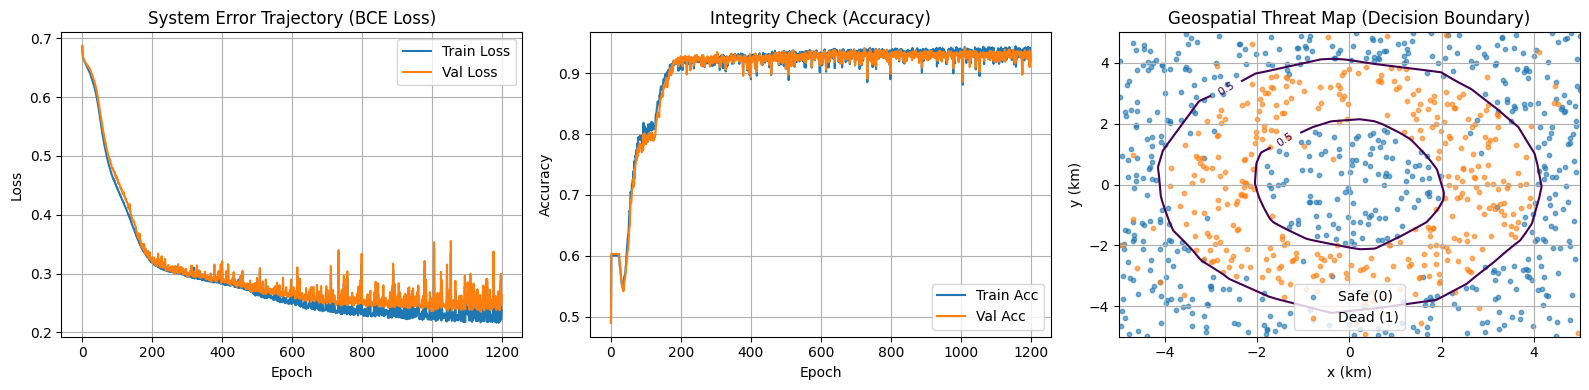


Final Metrics:
Train Acc: 92.24% | Val Acc: 92.00%


In [9]:
# PART 6: Required Output
# 1) Loss trajectory plot
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("System Error Trajectory (BCE Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2) Accuracy plot
plt.subplot(1, 3, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.title("Integrity Check (Accuracy)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# 3) Decision boundary map
# Creating a grid over original coordinate space [-5,5]x[-5,5]
x_min, x_max = -5.0, 5.0
y_min, y_max = -5.0, 5.0
res = 250  # grid resolution

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, res),
    np.linspace(y_min, y_max, res)
)
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
grid_t = torch.tensor(grid, device=device)

# normalize grid using train stats
grid_t_n = (grid_t - mu) / std

with torch.no_grad():
    probs = forward(grid_t_n).cpu().numpy().reshape(res, res)

plt.subplot(1, 3, 3)

# contour at decision boundary = 0.5
cs = plt.contour(xx, yy, probs, levels=[0.5])
plt.clabel(cs, inline=True, fontsize=8)

# plot validation points
Xv = X_val.cpu().numpy()
yv = y_val.cpu().numpy().reshape(-1)

plt.scatter(Xv[yv == 0, 0], Xv[yv == 0, 1], s=10, alpha=0.6, label="Safe (0)")
plt.scatter(Xv[yv == 1, 0], Xv[yv == 1, 1], s=10, alpha=0.6, label="Dead (1)")

plt.title("Geospatial Threat Map (Decision Boundary)")
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Metrics:")
print(f"Train Acc: {train_accs[-1]*100:.2f}% | Val Acc: {val_accs[-1]*100:.2f}%")
